In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy.spatial import distance

# 1. Análise exploratória

In [34]:
data = pd.read_csv('df.csv')

In [35]:
# Describes the Data Set
data.head()

,id,name,popularity,album,genres,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0XMl0fVTh3PyPlwyJTn33n,Be Someone (feat. Ray X Ben),62,"{'album_type': 'SINGLE', 'artists': [{'externa...","['brazilian edm', 'trance brasileiro', 'brazil...",0.711,0.722,2,-8.438,1,...,0.000013,0.6280,0.398,120.058,audio_features,spotify:track:0XMl0fVTh3PyPlwyJTn33n,https://api.spotify.com/v1/tracks/0XMl0fVTh3Py...,https://api.spotify.com/v1/audio-analysis/0XMl...,166005,4
1,4DYmJ19DhmxUe26QhANDYv,Folgado - Ao Vivo,57,"{'album_type': 'ALBUM', 'artists': [{'external...","['arrocha', 'sertanejo', 'sertanejo universita...",0.712,0.890,1,-3.792,0,...,0.000000,0.0726,0.569,163.848,audio_features,spotify:track:4DYmJ19DhmxUe26QhANDYv,https://api.spotify.com/v1/tracks/4DYmJ19DhmxU...,https://api.spotify.com/v1/audio-analysis/4DYm...,163902,4
2,1k1egPmIPWQ0J44PWgMDwA,Nois é Nois,73,"{'album_type': 'SINGLE', 'artists': [{'externa...","['trap brasileiro', 'trap brasileiro']",0.770,0.814,7,-4.903,1,...,0.000000,0.0916,0.618,148.001,audio_features,spotify:track:1k1egPmIPWQ0J44PWgMDwA,https://api.spotify.com/v1/tracks/1k1egPmIPWQ0...,https://api.spotify.com/v1/audio-analysis/1k1e...,120000,4
3,6Q8ljVgg7kR0R5v2aOXHlg,Sweet Dreams,60,"{'album_type': 'ALBUM', 'artists': [{'external...","['pop', 'r&b']",0.694,0.825,1,-5.986,1,...,0.000019,0.0618,0.788,121.949,audio_features,spotify:track:6Q8ljVgg7kR0R5v2aOXHlg,https://api.spotify.com/v1/tracks/6Q8ljVgg7kR0...,https://api.spotify.com/v1/audio-analysis/6Q8l...,208067,4
4,4iz9lGMjU1lXS51oPmUmTe,Homecoming,84,"{'album_type': 'ALBUM', 'artists': [{'external...","['chicago rap', 'hip hop', 'rap']",0.667,0.747,1,-7.059,1,...,0.000000,0.1150,0.918,86.917,audio_features,spotify:track:4iz9lGMjU1lXS51oPmUmTe,https://api.spotify.com/v1/tracks/4iz9lGMjU1lX...,https://api.spotify.com/v1/audio-analysis/4iz9...,203493,4


In [36]:
data.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,64.18200,0.703548,0.670402,5.538000,-6.128236,0.436000,0.137329,0.227214,0.014419,0.210775,0.514291,122.248920,203492.904000,3.992000
std,16.68213,0.129078,0.157024,3.541984,2.362872,0.496384,0.120917,0.226017,0.085005,0.184953,0.236684,25.131981,57307.554964,0.328865
min,0.00000,0.308000,0.264000,0.000000,-13.975000,0.000000,0.024900,0.000187,0.000000,0.019600,0.034500,60.019000,97960.000000,1.000000
25%,54.75000,0.617750,0.560000,2.000000,-7.479000,0.000000,0.048375,0.038025,0.000000,0.096650,0.334500,102.973000,165980.500000,4.000000
50%,67.00000,0.716000,0.679000,6.000000,-5.940000,0.000000,0.080450,0.149000,0.000000,0.132000,0.499500,123.052500,198344.000000,4.000000
75%,77.00000,0.800000,0.799250,8.000000,-4.484000,1.000000,0.196000,0.374250,0.000144,0.267500,0.709500,132.768000,230869.750000,4.000000
max,93.00000,0.975000,0.995000,11.000000,-0.681000,1.000000,0.650000,0.922000,0.882000,0.965000,0.979000,207.982000,547733.000000,5.000000


In [50]:
data['genres'].value_counts()

[]                                                                                                                                                                           21
['funk bh', 'funk mtg']                                                                                                                                                      10
['chicago rap', 'rap', 'hip hop']                                                                                                                                             8
['hip hop', 'rap', 'canadian hip hop', 'pop rap', 'canadian pop']                                                                                                             8
['sertanejo universitario', 'sertanejo pop', 'agronejo', 'sertanejo', 'arrocha']                                                                                              6
                                                                                                                        

We discover that 28.2% of the music analysed don´t have any genre atributted to it, and many of the ones that do, have multiple values

In [37]:
#Cleansd the data 
data['genres'] = data['genres'].fillna('')  # Replace NaN with empty string
data['genres'] = data['genres'].apply(lambda x: x if isinstance(x, str) else str(x))
data['genres'] = data['genres'].str.replace(r'[\[\]]', '', regex=True)

# Removes Duplicates and turns into rows
data['genres'] = data['genres'].map(lambda x: list(set(x.split(', '))) if x.strip() else [])

# Flattens the list
flat_list = [genre for sublist in data['genres'] for genre in sublist]

# Convert the flat list to a Series and count value occurrences
genre_series = pd.Series(flat_list)
genre_series.value_counts()


'rap'              136
'hip hop'           95
'pop'               78
'trap'              65
'pop rap'           63
                  ... 
'chill baile'        1
'irish rock'         1
'urbano latino'      1
'reggaeton'          1
'belgian dance'      1
Length: 322, dtype: int64

In [38]:
# Gets the 5 most heard genres
genre_counts.head(5)

"'rap'"        136
"'hip hop'"     95
"'pop'"         78
"'trap'"        65
"'pop rap'"     63
dtype: int64

In [39]:
data.sort_values(by = 'popularity',ascending=False).head(10)

,id,name,popularity,album,genres,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
7,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,93,"{'album_type': 'ALBUM', 'artists': [{'external...","['permanent wave', 'rock', 'garage rock', 'she...",0.464,0.417,0,-9.345,0,...,0.022000,0.0974,0.479,67.528,audio_features,spotify:track:5XeFesFbtLpXzIVDNQP22n,https://api.spotify.com/v1/tracks/5XeFesFbtLpX...,https://api.spotify.com/v1/audio-analysis/5XeF...,183956,4
48,42VsgItocQwOQC3XWZ8JNA,FE!N (feat. Playboi Carti),93,"{'album_type': 'ALBUM', 'artists': [{'external...","['hip hop', 'rap', 'rage rap', 'atl hip hop', ...",0.569,0.882,3,-2.777,0,...,0.000000,0.1420,0.201,148.038,audio_features,spotify:track:42VsgItocQwOQC3XWZ8JNA,https://api.spotify.com/v1/tracks/42VsgItocQwO...,https://api.spotify.com/v1/audio-analysis/42Vs...,191701,4
399,1odExI7RdWc4BT515LTAwj,Daylight,91,"{'album_type': 'SINGLE', 'artists': [{'externa...","['gen z singer-songwriter', 'singer-songwriter...",0.508,0.430,2,-9.475,0,...,0.000441,0.0930,0.324,130.090,audio_features,spotify:track:1odExI7RdWc4BT515LTAwj,https://api.spotify.com/v1/tracks/1odExI7RdWc4...,https://api.spotify.com/v1/audio-analysis/1odE...,212954,4
70,59NraMJsLaMCVtwXTSia8i,Prada,90,"{'album_type': 'SINGLE', 'artists': [{'externa...","['uk hip hop', 'uk pop', 'hypertechno', 'uk co...",0.638,0.717,8,-5.804,1,...,0.000002,0.1130,0.422,141.904,audio_features,spotify:track:59NraMJsLaMCVtwXTSia8i,https://api.spotify.com/v1/tracks/59NraMJsLaMC...,https://api.spotify.com/v1/audio-analysis/59Nr...,132359,4
456,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,90,"{'album_type': 'ALBUM', 'artists': [{'external...","['pop', 'dance pop']",0.726,0.698,5,-4.165,1,...,0.000000,0.3090,0.867,143.994,audio_features,spotify:track:3w3y8KPTfNeOKPiqUTakBh,https://api.spotify.com/v1/tracks/3w3y8KPTfNeO...,https://api.spotify.com/v1/audio-analysis/3w3y...,233478,4
13,5mjYQaktjmjcMKcUIcqz4s,Strangers,90,"{'album_type': 'SINGLE', 'artists': [{'externa...",['singer-songwriter pop'],0.628,0.523,11,-8.307,0,...,0.002740,0.2190,0.416,169.982,audio_features,spotify:track:5mjYQaktjmjcMKcUIcqz4s,https://api.spotify.com/v1/tracks/5mjYQaktjmjc...,https://api.spotify.com/v1/audio-analysis/5mjY...,172965,4
50,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,89,"{'album_type': 'SINGLE', 'artists': [{'externa...","['pop', 'piano rock']",0.704,0.797,0,-5.927,1,...,0.000745,0.0546,0.825,139.994,audio_features,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,https://api.spotify.com/v1/tracks/4h9wh7iOZ0GG...,https://api.spotify.com/v1/audio-analysis/4h9w...,148486,4
363,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,88,"{'album_type': 'ALBUM', 'artists': [{'external...","['shiver pop', 'indietronica', 'pov: indie', '...",0.761,0.525,11,-6.900,1,...,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4
374,68Dni7IE4VyPkTOH9mRWHr,No Role Modelz,88,"{'album_type': 'ALBUM', 'artists': [{'external...","['north carolina hip hop', 'conscious hip hop'...",0.690,0.521,10,-8.492,0,...,0.000000,0.0534,0.494,100.028,audio_features,spotify:track:68Dni7IE4VyPkTOH9mRWHr,https://api.spotify.com/v1/tracks/68Dni7IE4VyP...,https://api.spotify.com/v1/audio-analysis/68Dn...,292799,4
30,6wsqVwoiVH2kde4k4KKAFU,I KNOW ?,88,"{'album_type': 'ALBUM', 'artists': [{'external...","['hip hop', 'rap', 'slap house']",0.927,0.619,5,-4.441,0,...,0.000000,0.1040,0.817,117.995,audio_features,spotify:track:6wsqVwoiVH2kde4k4KKAFU,https://api.spotify.com/v1/tracks/6wsqVwoiVH2k...,https://api.spotify.com/v1/audio-analysis/6wsq...,211582,4


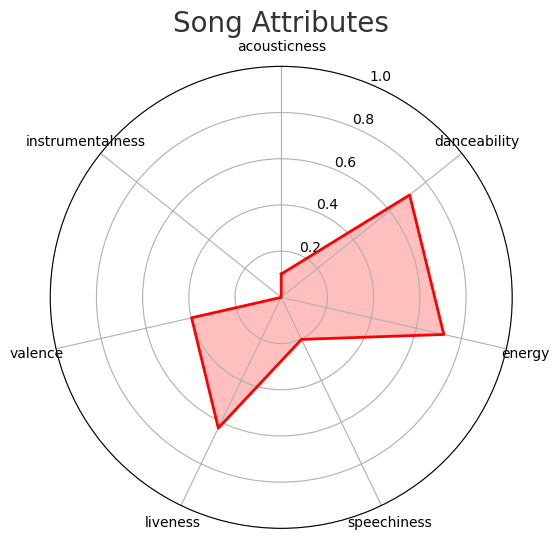

In [48]:
columns_to_plot = ['acousticness', 'danceability', 'energy', 'speechiness', 'liveness', 'valence','instrumentalness']
values = data.loc[0, columns_to_plot].tolist()
values += values[:1]
num_vars = len(columns_to_plot)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # to complete the loop
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), columns_to_plot)
ax.set_ylim(0, 1)

plt.title('Song Attributes', size=20, color='#333333')

plt.show()

In the graph above there is a quick view of the mean of each audio feature. As we can see, this is a very lively set of musics, with little to no instrumentalness, which is the amount of spoken word in a track. It is important to note that speechiness is not the opposite of instrumentalness, and specially for music, the mean stays around 0.33 and 0.66.

# Now for a brief view of each audio feature

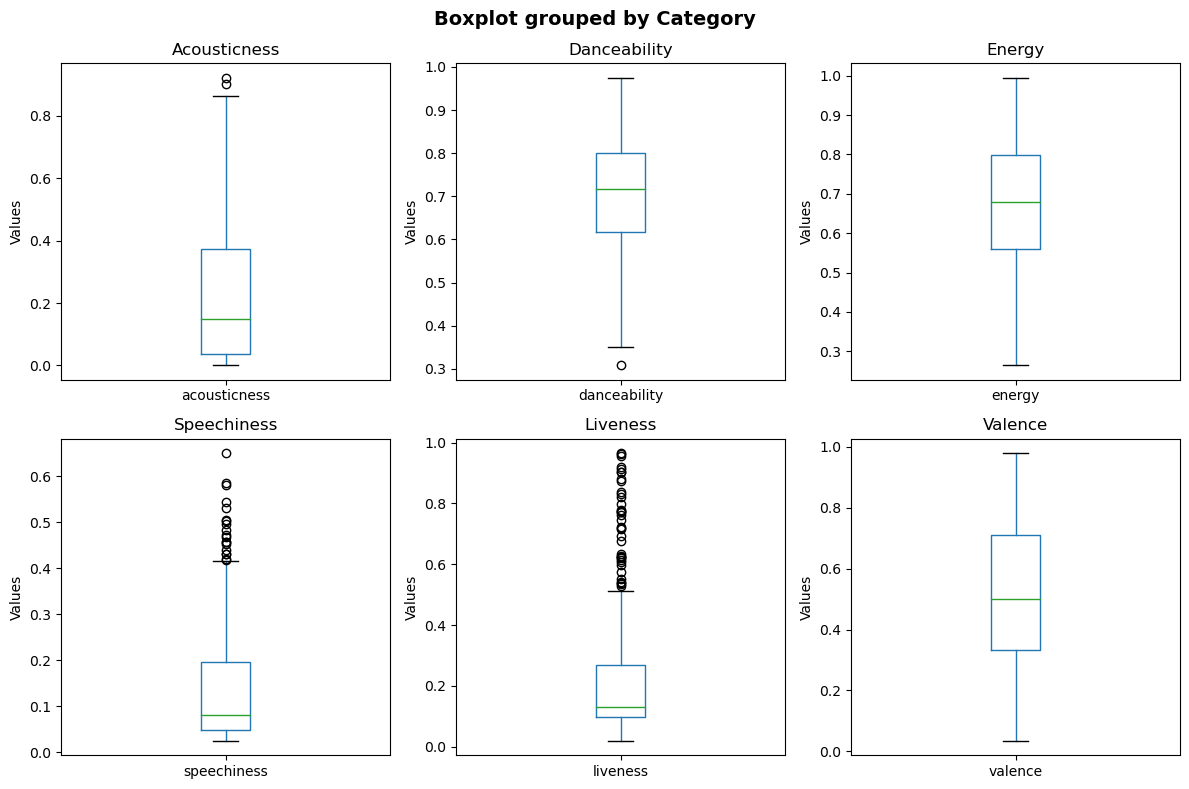

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    data.boxplot(column=col, ax=axs[i], grid=False)
    axs[i].set_title(col.capitalize())
    axs[i].set_ylabel('Values')

plt.suptitle('Boxplot grouped by Category', fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

The liveness has a lot of outliers, that is because it indicates if the music was performed live or not, and this amount of different data is something we would expect.

In [66]:
data.sort_values(by = 'speechiness',ascending=False).head(10)

,id,name,popularity,album,genres,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
135,6ekV6MGnPTuCOnjB4VcWGc,Dead Or Alive,54,"{'album_type': 'SINGLE', 'artists': [{'externa...","['underground hip hop', 'canadian trap', 'cana...",0.456,0.793,5,-5.569,1,...,0.0,0.1690,0.707,205.348,audio_features,spotify:track:6ekV6MGnPTuCOnjB4VcWGc,https://api.spotify.com/v1/tracks/6ekV6MGnPTuC...,https://api.spotify.com/v1/audio-analysis/6ekV...,194947,4
299,4p55EkzkGnWmLYDiNXc14t,Bands,57,"{'album_type': 'ALBUM', 'artists': [{'external...","['underground hip hop', 'trap']",0.831,0.456,10,-10.778,1,...,0.0,0.0669,0.535,158.006,audio_features,spotify:track:4p55EkzkGnWmLYDiNXc14t,https://api.spotify.com/v1/tracks/4p55EkzkGnWm...,https://api.spotify.com/v1/audio-analysis/4p55...,98734,4
295,3Wypq2rlasi7mfYEhaln3C,Fake Sh!t (feat. NoCap),42,"{'album_type': 'ALBUM', 'artists': [{'external...","['florida rap', 'alabama rap', 'atl trap', 'fl...",0.849,0.448,7,-10.003,0,...,0.0,0.0798,0.200,103.059,audio_features,spotify:track:3Wypq2rlasi7mfYEhaln3C,https://api.spotify.com/v1/tracks/3Wypq2rlasi7...,https://api.spotify.com/v1/audio-analysis/3Wyp...,210625,4
466,5tsaqgcjeZyEfLHO1DkISq,Chapei,48,"{'album_type': 'SINGLE', 'artists': [{'externa...",['brazilian hip hop'],0.631,0.522,7,-8.076,1,...,0.0,0.0992,0.496,91.428,audio_features,spotify:track:5tsaqgcjeZyEfLHO1DkISq,https://api.spotify.com/v1/tracks/5tsaqgcjeZyE...,https://api.spotify.com/v1/audio-analysis/5tsa...,297391,4
240,6vN77lE9LK6HP2DewaN6HZ,Yes Indeed,81,"{'album_type': 'ALBUM', 'artists': [{'external...","['rap', 'hip hop', 'atl trap', 'canadian hip h...",0.963,0.346,5,-9.309,0,...,0.0,0.1080,0.562,119.957,audio_features,spotify:track:6vN77lE9LK6HP2DewaN6HZ,https://api.spotify.com/v1/tracks/6vN77lE9LK6H...,https://api.spotify.com/v1/audio-analysis/6vN7...,142273,4
267,5hTpBe8h35rJ67eAWHQsJx,Caroline,71,"{'album_type': 'ALBUM', 'artists': [{'external...","['rap', 'portland hip hop', 'pop rap', 'underg...",0.940,0.335,5,-10.179,0,...,0.0,0.2620,0.707,120.040,audio_features,spotify:track:5hTpBe8h35rJ67eAWHQsJx,https://api.spotify.com/v1/tracks/5hTpBe8h35rJ...,https://api.spotify.com/v1/audio-analysis/5hTp...,209640,4
231,4IO8X9W69dIQe0EC5ALXhq,Immortal,72,"{'album_type': 'SINGLE', 'artists': [{'externa...","['atl hip hop', 'rap', 'hip hop']",0.741,0.870,6,-3.494,0,...,0.0,0.1140,0.663,184.194,audio_features,spotify:track:4IO8X9W69dIQe0EC5ALXhq,https://api.spotify.com/v1/tracks/4IO8X9W69dIQ...,https://api.spotify.com/v1/audio-analysis/4IO8...,254723,4
443,0vwOWwl785S9EU1wtbeLLJ,BookBag 2.0 (feat. Polo G),67,"{'album_type': 'ALBUM', 'artists': [{'external...","['chicago rap', 'rap', 'philly drill']",0.909,0.541,8,-6.436,1,...,0.0,0.0942,0.823,135.106,audio_features,spotify:track:0vwOWwl785S9EU1wtbeLLJ,https://api.spotify.com/v1/tracks/0vwOWwl785S9...,https://api.spotify.com/v1/audio-analysis/0vwO...,171245,4
382,1AfNdxHdE4OLcnQUyC6j3i,Eterna Sacanagem,60,"{'album_type': 'SINGLE', 'artists': [{'externa...","['sertanejo universitario', 'funk pop', 'funk ...",0.558,0.675,8,-4.564,1,...,0.0,0.1060,0.769,92.678,audio_features,spotify:track:1AfNdxHdE4OLcnQUyC6j3i,https://api.spotify.com/v1/tracks/1AfNdxHdE4OL...,https://api.spotify.com/v1/audio-analysis/1AfN...,168800,5
496,1n5Rzk23vvIRHeIH3g4Fdc,Demi,45,"{'album_type': 'ALBUM', 'artists': [{'external...","['underground hip hop', 'trap']",0.808,0.613,1,-3.237,1,...,0.0,0.2610,0.302,156.978,audio_features,spotify:track:1n5Rzk23vvIRHeIH3g4Fdc,https://api.spotify.com/v1/tracks/1n5Rzk23vvIR...,https://api.spotify.com/v1/audio-analysis/1n5R...,98599,4


By analysing the music that has the most spoken word, we can se a prevalence of brazilian trap and rap

# Now lets see what makes me like a song better than others.

Based on Spotify, the audio features are classified in 3 different ways:
    
   **Mood** : Danceability, Valence, Tempo, Energy
   
   **Context** : Liveness, Acousticness
   
   **Properties** : Loudness, Speechiness, Instrumentality



### Firstly lets analyse the mood, since tempo is not important for us, lets make a 3d graph using the other 3 variables.

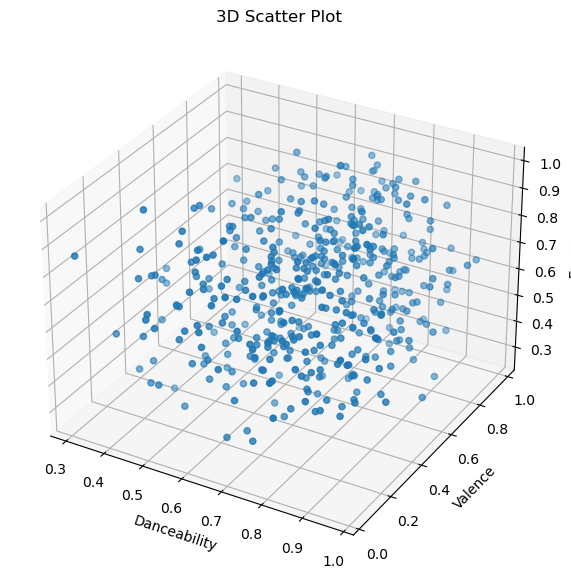

In [68]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = data['danceability']
y = data['valence']
z = data['energy']

scatter = ax.scatter(x, y, z)

ax.set_xlabel('Danceability')
ax.set_ylabel('Valence')
ax.set_zlabel('Energy')
ax.set_title('3D Scatter Plot')
plt.show()

This graph only shows us that the values are all over the place, so lets plot them in 2 dimensions to see if there are some correlations between each variable

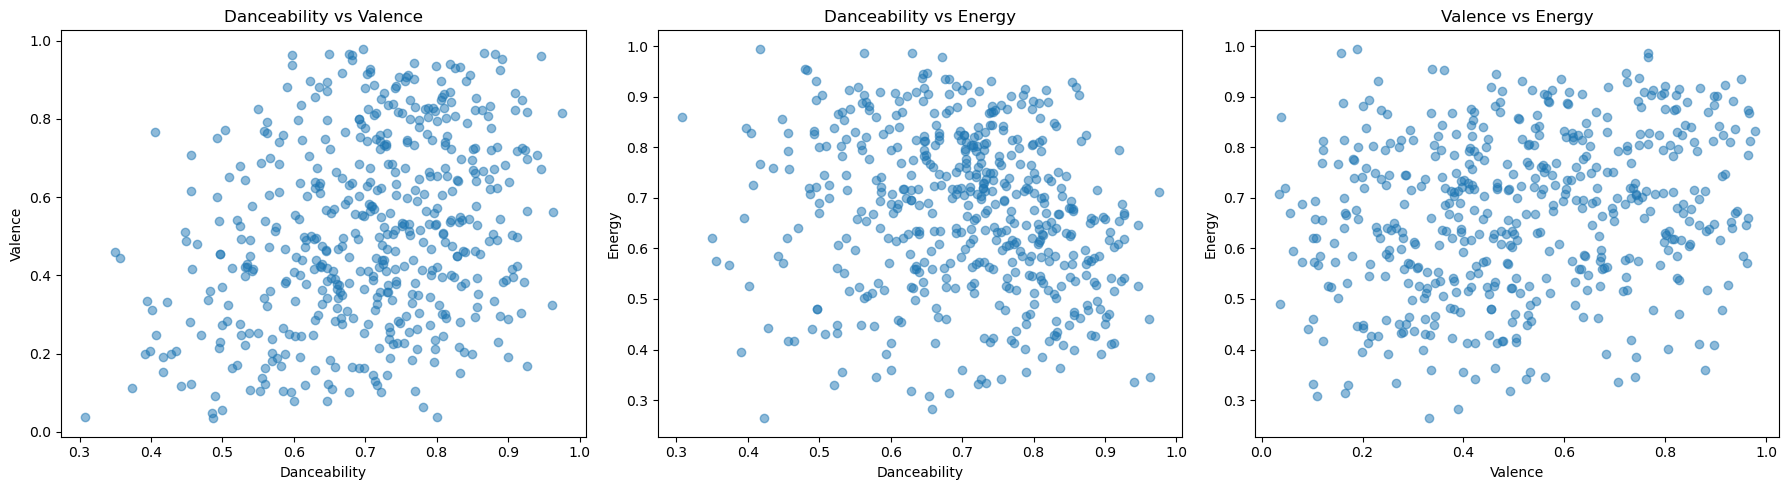

In [69]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)  
plt.scatter(data['danceability'], data['valence'], alpha=0.5)
plt.title('Danceability vs Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')

plt.subplot(1, 3, 2) 
plt.scatter(data['danceability'], data['energy'], alpha=0.5)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

plt.subplot(1, 3, 3) 
plt.scatter(data['valence'], data['energy'], alpha=0.5)
plt.title('Valence vs Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')

# Show plot
plt.tight_layout()
plt.show()

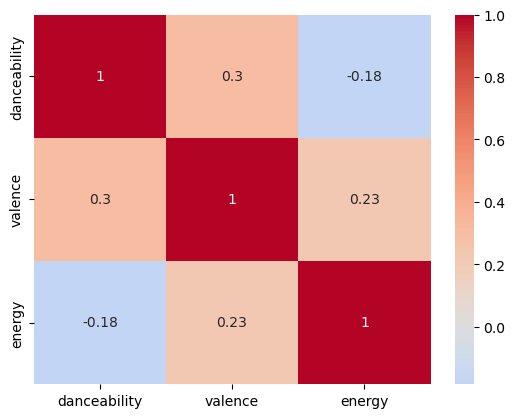

In [72]:
correlation_matrix_mood = data[['danceability', 'valence', 'energy']].corr()
sns.heatmap(correlation_matrix_mood, annot=True, cmap='coolwarm', center=0)
plt.show()

Based on this heatmap, we can see a 0.3 correlation between the valence and the danceability, it isn't a big value, so we can't make any assumpions. Because the values were so low, the only conclusion is that there is a randomness to how the variables work between each other.

### Now, since we haven't discovered much analysing the mood features, let's look at the context featuress

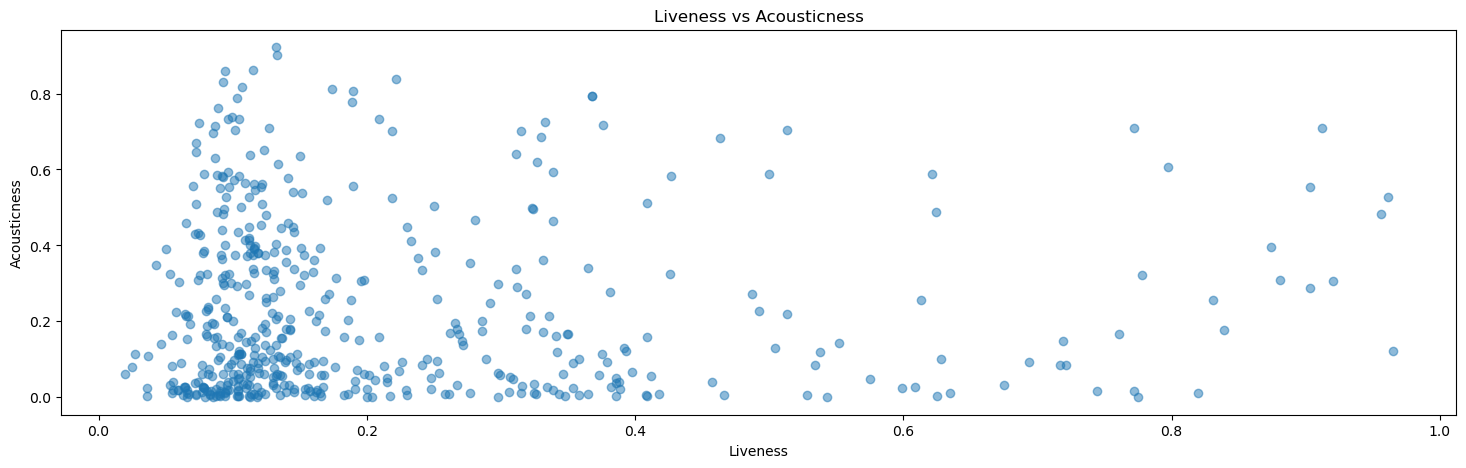

In [74]:
plt.figure(figsize=(18, 5))

plt.scatter(data['liveness'], data['acousticness'], alpha=0.5)
plt.title('Liveness vs Acousticness')
plt.xlabel('Liveness')
plt.ylabel('Acousticness')

plt.show()

In [76]:
correlation_context = data[['liveness','acousticness']].corr()
print(correlation_context)

              liveness  acousticness
liveness      1.000000      0.015483
acousticness  0.015483      1.000000


Like the one before, there seems to be no correlation between the values.

### Now for properties:

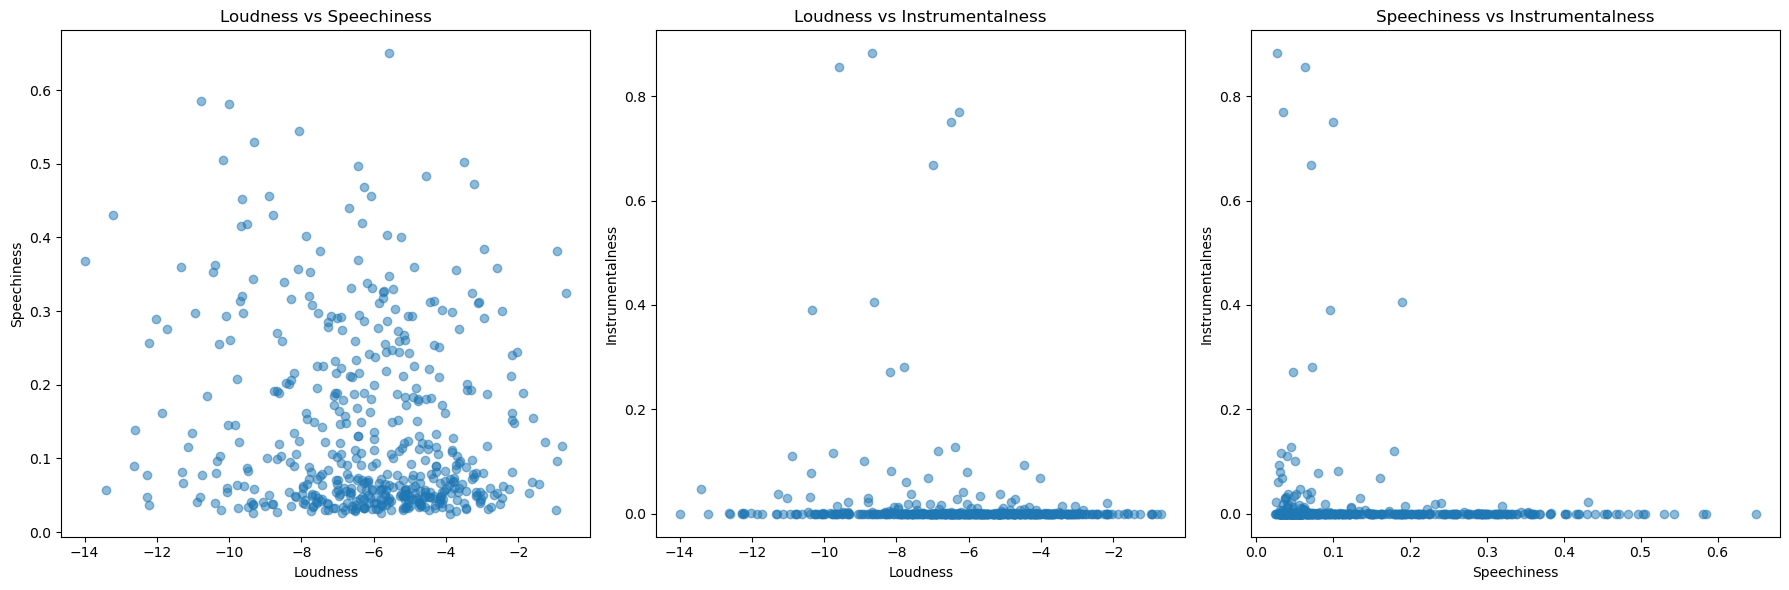

In [77]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  
plt.scatter(data['loudness'], data['speechiness'], alpha=0.5)
plt.title('Loudness vs Speechiness')
plt.xlabel('Loudness')
plt.ylabel('Speechiness')

plt.subplot(1, 3, 2) 
plt.scatter(data['loudness'], data['instrumentalness'], alpha=0.5)
plt.title('Loudness vs Instrumentalness')
plt.xlabel('Loudness')
plt.ylabel('Instrumentalness')

plt.subplot(1, 3, 3) 
plt.scatter(data['speechiness'], data['instrumentalness'], alpha=0.5)
plt.title('Speechiness vs Instrumentalness')
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')

plt.tight_layout()
plt.show()

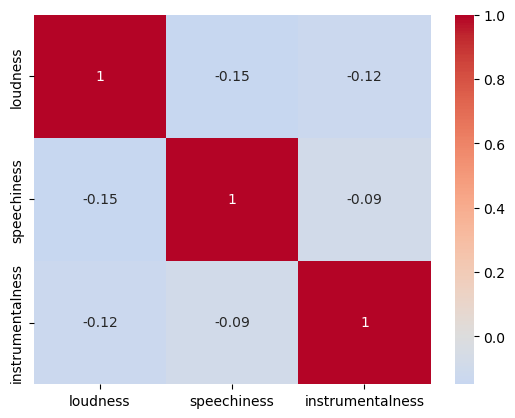

In [78]:
correlation_matrix_mood = data[['loudness', 'speechiness', 'instrumentalness']].corr()
sns.heatmap(correlation_matrix_mood, annot=True, cmap='coolwarm', center=0)
plt.show()

Like the one before, there seems to be no correlation between the values, even though, tracks with more spoken words (speechiness) are slightly less likely to be instrumental, there is not a strong correlation between them.

### Now, since we the only conclusion we had is that, inside each feature there isn't any dominant pattern linking the features, let's see if we can find any pattern when we compare all the features

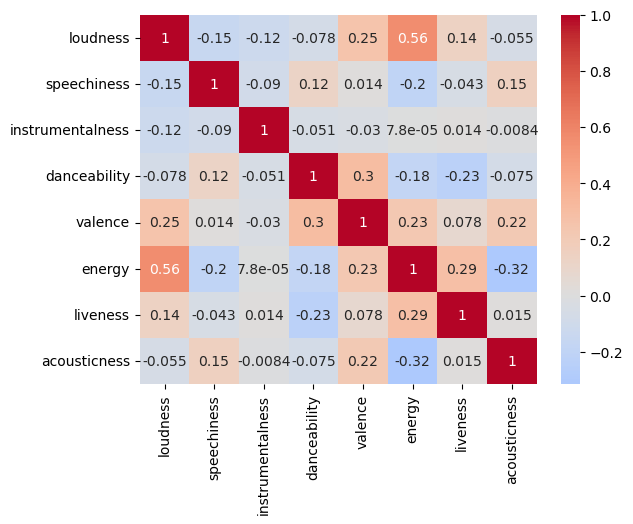

In [79]:
correlation_matrix_mood = data[['loudness', 'speechiness', 'instrumentalness','danceability', 'valence', 'energy','liveness','acousticness']].corr()
sns.heatmap(correlation_matrix_mood, annot=True, cmap='coolwarm', center=0)
plt.show()

As we can see, there is a medium correlation between energy and loudness, which makes perfect sense since the more energy the music conveys, normally the louder it is.

# Exploring how similar are the songs in the dataframe

Cosine similarity is a measure used to determine the similarity between two vectors by calculating the cosine of the angle between them. It is particularly useful in high-dimensional spaces, as is common in text analysis and other types of data analytics involving multiple metrics or features.

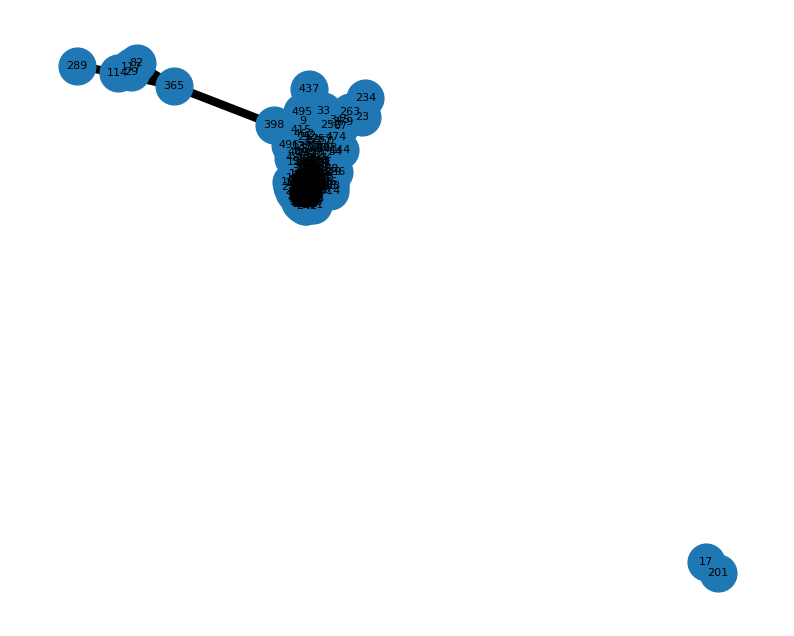

Number of nodes: 490
Number of edges: 66392


In [96]:
audio_features = ['loudness', 'speechiness', 'instrumentalness', 
                  'danceability', 'valence', 'energy', 'liveness', 'acousticness']

feature_data = data[audio_features]


cosine_sim_matrix = 1 - pd.DataFrame(
    distance.cdist(feature_data.values, feature_data.values, 'cosine'),
    index=data.index, columns=data.index
)

G = nx.Graph()

threshold = 0.99
for i in range(len(cosine_sim_matrix)):
    for j in range(i + 1, len(cosine_sim_matrix)):
        if cosine_sim_matrix.iloc[i, j] >= threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix.iloc[i, j])


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.axis('off')  
plt.show()


print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


In [97]:
threshold = 0.99
connections_count = (cosine_sim_matrix > threshold).sum(axis=1)
max_connections_index = connections_count.idxmax()
song_with_most_connections = data.loc[max_connections_index, 'name']  # assuming 'id' is the column with song identifiers

print(f"The song with the most connections is: {song_with_most_connections} with {connections_count[max_connections_index]} connections.")

The song with the most connections is: Superhero (Heroes & Villains) [with Future & Chris Brown] with 399 connections.


As we can see, even though there isn't any big correlations between the audio features and the points on each audio feature are really diverse, we can see that the songs analysed are very similar, with a lot of connections between them.